In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

In [152]:
training = pd.read_csv('train.csv', index_col=0)
testing = pd.read_csv('test.csv', index_col=0)

testing['Survived'] = np.NaN

In [153]:
from sklearn.ensemble import RandomForestClassifier

y = training["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(training[features])
X_test = pd.get_dummies(testing[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

NameError: name 'train_data' is not defined

In [71]:
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [72]:
%matplotlib inline
training.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
training.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
# Some of the information above isn't really helpful.
# No one 38% survived.
# Things like survival and class aren't numbers we can average. They're categorical.
# Other things like Age and Fare can tell us more. They're numerical.
# Let's separate numerical and categorical data so we can get rid of some of the noise
numdata = training[['Age','SibSp','Parch','Fare']]
catdata = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [75]:
numdata.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [76]:
# So the average age on the Titanic was a little more than twenty-nine and a half.
# The youngest kid wasn't even a year old.
# And the oldest person was 80.
# Most people didn't have a sibling or spouse on board.
# But at least one person had eight siblings (or spouses, but hopefully siblings).
# All interesting data.
# Let's look at some more number-based data.
training [["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [77]:
# So the average age on the Titanic was a little higher for men than women.
training.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [78]:
# So women across the board paid more regardless of which class they were in.
# Which is interesting, though maybe not important for our goal
training ["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [79]:
# So most of the passengers did not have a spouse or sibling onboard
# Of those that did most only had one.
# There were five people who had five spouses or siblings - hopefully siblings.
training.groupby(["SibSp", "Pclass"])["Age"].mean()

SibSp  Pclass
0      1         39.181416
       2         31.934220
       3         27.630201
1      1         37.414154
       2         27.363636
       3         24.912698
2      1         37.200000
       2         19.125000
       3         18.875000
3      1         22.000000
       2         30.000000
       3          8.875000
4      3          7.055556
5      3         10.200000
8      3               NaN
Name: Age, dtype: float64

In [80]:
# So it looks like the average ages for people with no siblings or spouse onboard were older than those with.
# And there was no one in first or second class with more than three siblings or a sibling/spouse combo of more than three.
training ["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

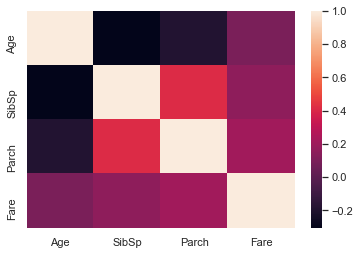

In [81]:
# So most people didn't have a parent or child onboard
print(numdata.corr())
sns.heatmap(numdata.corr())

In [82]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare']) #pivot tables to help parse the data further

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [83]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

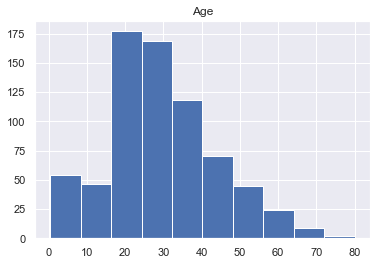

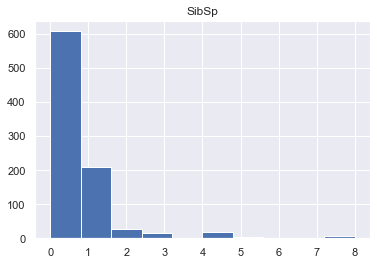

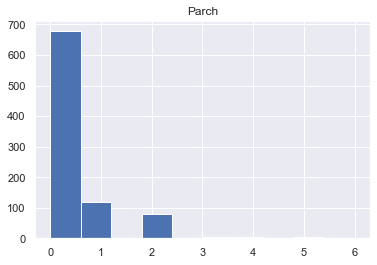

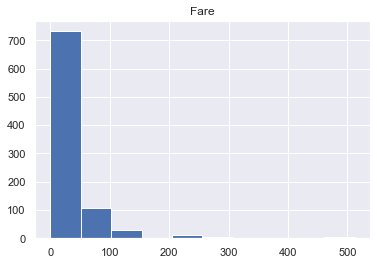

In [84]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


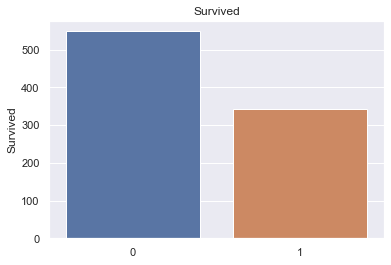

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


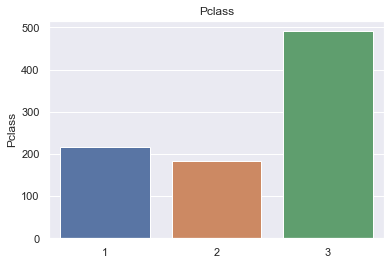

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


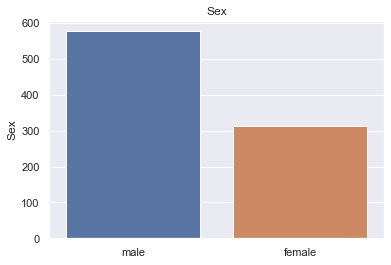

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


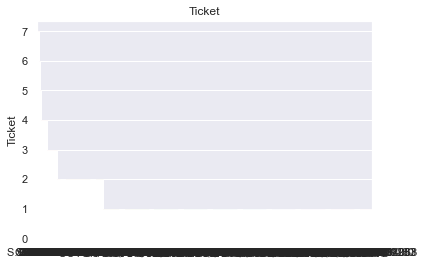

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


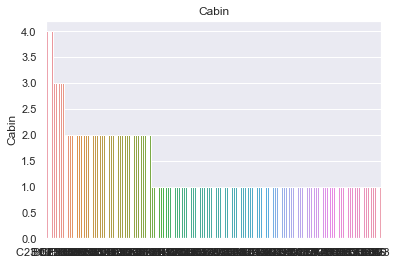

C:\Users\rano3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


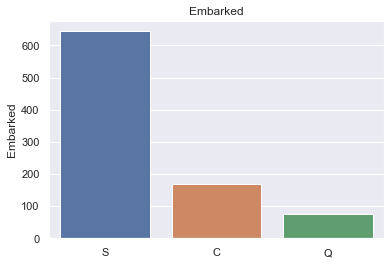

In [85]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [86]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))  #this allows us to view pivot tables with  numeric values of who survived on the 3 criteria of ticket class, gender and location of boarding the titanic
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [87]:
women = training.loc[training.Sex == 'female']["Survived"]  #this is the code to show us the exact percentage of women that survived 
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [88]:
men = training.loc[training.Sex == 'male']["Survived"] #this shows the exact percentage of men that survived, this is important to show the contrast between male and female survival rates
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [89]:
# This is ripped straight from Ken Jee's tutorial.
# It has the desired effect of getting rid of the name (something we proved earlier doesn't parse)
# And in turn making something parsable, ie Title.
training['Title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Sir               1
Don               1
Lady              1
Capt              1
Ms                1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [90]:
training['MultipleCabins'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['MultipleCabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: MultipleCabins, dtype: int64

In [91]:
training['CabinDeck'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.CabinDeck.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinDeck, dtype: int64


In [92]:
training [training ["Name"].str.contains("Lee")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MultipleCabins,CabinDeck
PassengerId,,,,,,,,,,,,,,
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,0,n
170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,0,n
554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C,Mr,0,n


In [93]:
testing['MultipleCabins'] = testing.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
testing['MultipleCabins'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: MultipleCabins, dtype: int64

In [94]:
testing['Title'] = testing.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
testing['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [95]:
testing['CabinDeck'] = testing.Cabin.apply(lambda x: str(x)[0])
testing['CabinDeck'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: CabinDeck, dtype: int64

In [96]:
training.Age = training.Age.fillna(training.Age.median())

In [97]:
testing.Age = testing.Age.fillna(testing.Age.median())

In [98]:
training.dropna(subset=['Embarked'],inplace = True)

In [99]:
testing.dropna(subset=['Embarked'], inplace = True)

In [100]:
training.Pclass = training.Pclass.astype(str)

In [101]:
testing.Pclass = testing.Pclass.astype(str)

In [102]:
training

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,MultipleCabins,CabinDeck
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,n
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,n
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,0,n
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,n


In [103]:
testing

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,MultipleCabins,Title,CabinDeck
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,Mr,n
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,0,Mrs,n
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,Mr,n
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,0,Mr,n
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,Mrs,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,NaN,0,Mr,n
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,1,Dona,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,0,Mr,n


In [104]:
traindum = pd.get_dummies(training[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Title', 
                                    'MultipleCabins', 'CabinDeck']])

In [105]:
testdum = pd.get_dummies(testing[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Title', 'MultipleCabins', 'CabinDeck']])

In [106]:
traindum

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_the Countess,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38.0,1,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,26.0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,35.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,19.0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
889,28.0,1,2,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
testdum

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_Ms,Title_Rev,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
893,47.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,62.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
895,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
896,22.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,39.0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1307,38.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
testdum2 = testdum.reindex(labels=traindum.columns,axis=1)

In [109]:
testdum2

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_the Countess,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,1,0,1,0,...,NaN,0,0,0,0,0,0,0,NaN,1
893,47.0,1,0,0,0,0,1,1,0,0,...,NaN,0,0,0,0,0,0,0,NaN,1
894,62.0,0,0,0,0,1,0,0,1,0,...,NaN,0,0,0,0,0,0,0,NaN,1
895,27.0,0,0,0,0,0,1,0,1,0,...,NaN,0,0,0,0,0,0,0,NaN,1
896,22.0,1,1,0,0,0,1,1,0,0,...,NaN,0,0,0,0,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,0,0,0,0,0,1,0,1,0,...,NaN,0,0,0,0,0,0,0,NaN,1
1306,39.0,0,0,1,1,0,0,1,0,1,...,NaN,0,0,1,0,0,0,0,NaN,0
1307,38.5,0,0,0,0,0,1,0,1,0,...,NaN,0,0,0,0,0,0,0,NaN,1


In [110]:
testdum2.fillna("0")

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_the Countess,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
893,47.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,62.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
895,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
896,22.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,39.0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1307,38.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
testdum2.columns

Index(['Age', 'SibSp', 'Parch', 'MultipleCabins', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D',
       'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T',
       'CabinDeck_n'],
      dtype='object')

In [112]:
testdum2.rename(columns={'Title_the Countess': 'Title_the_Countess'}, inplace=True)

In [113]:
#testdum2.fillna("Zoot")
testdum2['Title_the_Countess'] = testdum2['Title_the_Countess'].fillna("0")
testdum2

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_the_Countess,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
893,47.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,NaN,1
894,62.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
895,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
896,22.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
1306,39.0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,NaN,0
1307,38.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1


In [114]:
testdum2['Title_Sir'] = testdum2['Title_Sir'].fillna("0")
# testdum2.Title_Sir = testdum2.Title_Sir.astype(str)

In [115]:
testdum2['Title_Mlle'] = testdum2['Title_Mlle'].fillna("0")
# testdum2.Title_Mlle = testdum2.Title_Mlle.astype(str)

In [116]:
testdum2['Title_Major'] = testdum2['Title_Major'].fillna("0")
# testdum2.Title_Major = testdum2.Title_Major.astype(str)

In [117]:
testdum2['Title_Mme'] = testdum2['Title_Mme'].fillna("0")
# testdum2.Title_Mme = testdum2.Title_Mme.astype(str)

In [118]:
testdum2['Title_Capt'] = testdum2['Title_Capt'].fillna("0")
# testdum2.Title_Capt = testdum2.Title_Capt.astype(str)

In [119]:
testdum2['Title_Lady'] = testdum2['Title_Lady'].fillna("0")
# testdum2.Title_Lady = testdum2.Title_Lady.astype(str)

In [120]:
testdum2['Title_Jonkheer'] = testdum2['Title_Jonkheer'].fillna("0")
# testdum2.Title_Jonkheer = testdum2.Title_Jonkheer.astype(str)

In [121]:
testdum2['Title_Don'] = testdum2['Title_Don'].fillna("0")
# testdum2.Title_Don = testdum2.Title_Don.astype(str)

In [122]:
testdum2['CabinDeck_T'] = testdum2['CabinDeck_T'].fillna("0")
# testdum2.CabinDeck_T = testdum2.CabinDeck_T.astype(str)

In [123]:
testdum2

,Age,SibSp,Parch,MultipleCabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Title_the_Countess,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
893,47.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,62.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
895,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
896,22.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,39.0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1307,38.5,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [128]:
y_train = training['Survived']

# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Title', 'MultipleCabins', 'CabinDeck']
# X_train = pd.get_dummies(training[features])
# X_test = pd.get_dummies(testing[features])
X_train = traindum 
X_test = testdum2

In [129]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.76966292 0.76404494 0.72316384]
0.7255316447660763


In [130]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.81460674 0.82022472 0.81460674 0.84745763]
0.8267948962102455


In [131]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.78089888 0.80337079 0.76404494 0.80225989]
0.7862946740303435


In [132]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.80898876 0.79213483 0.80898876 0.82485876]
0.8099155716371487


In [133]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.80337079 0.79775281 0.7752809  0.81355932]
0.790801752047229


In [134]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6741573  0.7247191  0.68539326 0.70786517 0.71751412]
0.7019297911508919


In [135]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [136]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.80337079 0.82022472 0.79775281 0.85310734]
0.8133180981400369


In [137]:
# With mean the results were, in order:
# gnb = 0.7255316447660763
# lr = 0.8267948962102455
# dt = 0.7874119215387545
# knn = 0.8019996191201676
# rf = 0.796419729575319
# svc = 0.696305465625595
# cv = 0.8155652891512727

In [138]:
# With median the results were, in order:
# gnb = 0.7255316447660763
# lr = 0.8267948962102455
# dt = 0.7862946740303435
# knn = 0.8099155716371487
# rf = 0.790801752047229
# svc = 0.7019297911508919
# cv = 0.8121945026344187

In [139]:
#Predictive analysis using Logistic Regression model
lr.fit(X_train,y_train)
#using features from test.csv(Class,Fare, Ticket etc...)
LR_Predicts=lr.predict(X_test)
#New dataset with predictions
LRoutput = pd.DataFrame({'Name': testing.Name, 'Survived': LR_Predicts})

# There is an error here because there are 8 fewer titles and 1 less CabinDeck
# Now I have the right number of columns, but some of the values are NaN and I need to change them to 0

In [140]:
LRoutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",1
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
1305,"Spector, Mr. Woolf",0
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0


In [141]:
dt.fit(X_train, y_train)
DT_Predicts=dt.predict(X_test)
DToutput = pd.DataFrame({'Name': testing.Name, 'Survived': DT_Predicts})

In [142]:
DToutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",1
895,"Wirz, Mr. Albert",1
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
1305,"Spector, Mr. Woolf",1
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0


In [143]:
knn.fit(X_train, y_train)
KNPred=knn.predict(X_test)
KNNoutput = pd.DataFrame({'Name': testing.Name, 'Survived': KNPred})

In [144]:
KNNoutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",1
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
1305,"Spector, Mr. Woolf",1
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0


In [145]:
rf.fit(X_train, y_train)
rfpred=rf.predict(X_test)
RFoutput=pd.DataFrame({'Name': testing.Name, 'Survived': rfpred})

In [146]:
RFoutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",1
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
1305,"Spector, Mr. Woolf",1
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0


In [147]:
svc.fit(X_train, y_train)
svcpred=svc.predict(X_test)
SVCoutput=pd.DataFrame({'Name': testing.Name, 'Survived': svcpred})

In [148]:
SVCoutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...
1305,"Spector, Mr. Woolf",0
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0


In [149]:
# voting_clf.fit(X_train, y_train)
# svcpred=svc.predict(X_test)
# VOTEoutput=pd.DataFrame({'Name': testing.Name, 'Survived': voting_clf.predict})

voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'Name': testing.Name, 'Survived': y_hat_base_vc}
VOTEoutput = pd.DataFrame(data=basic_submission)

In [150]:
VOTEoutput

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
1305,"Spector, Mr. Woolf",0
1306,"Oliva y Ocana, Dona. Fermina",1
1307,"Saether, Mr. Simon Sivertsen",0
